<a href="https://www.kaggle.com/code/mattspotify2023/titanic-abdul?scriptVersionId=142345115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


%%

In [3]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

%%

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


%%

<Axes: >

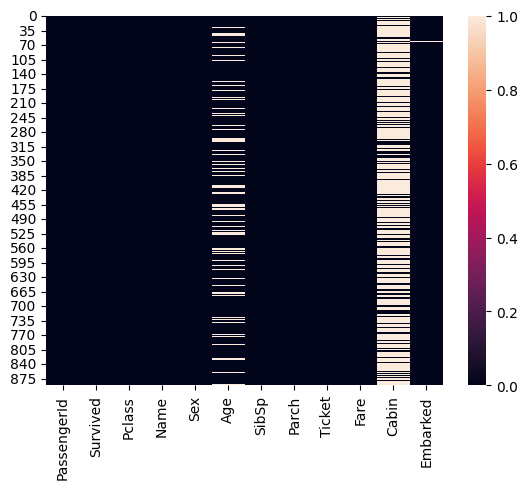

In [5]:
sns.heatmap(df.isnull())

%%

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

%%

In [7]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

%%

In [8]:
male_pass_count=df[df['Sex']=="male"]['Survived'].sum()
female_pass_count=df[df['Sex']=="female"]['Survived'].sum()

%%

In [9]:
male_total_count=(df['Sex']=="male").sum()
female_total_count=(df['Sex']=="female").sum()

%%

In [10]:
male_pass_percent=male_pass_count/male_total_count

%%

In [11]:
print("Number of males who survived ",male_pass_percent)

Number of males who survived  0.18890814558058924


%%

In [12]:
female_pass_percent=float(female_pass_count/female_total_count)

%%

In [13]:
print("{} is the percentage of males who survived and {} is the percentage of females who survived".format(male_pass_percent,female_pass_percent))

0.18890814558058924 is the percentage of males who survived and 0.7420382165605095 is the percentage of females who survived


%%

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

%%

In [15]:
df.groupby('Sex')[('Age')].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

%%

In [16]:
df["Age"].isna().sum()

177

%%

In [17]:
def age_impute(x,y):
    if x !=[] & y=='male':
        x=30.7
    elif x!=[] & y=='female':
        x=27.9
    return x,y

%%<br>
=df['Age'].iloc[888]<br>
=df['Sex'].iloc[888]<br>
ge_impute(x,y)

%%

<Axes: xlabel='Pclass', ylabel='count'>

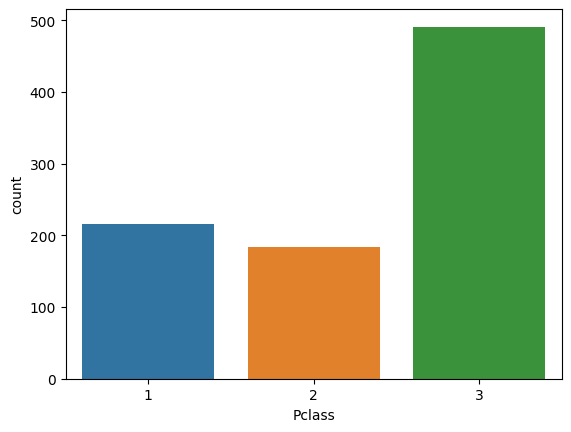

In [18]:
sns.countplot(x='Pclass',data=df)

%%

In [19]:
df._get_numeric_data().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

%%

<Axes: >

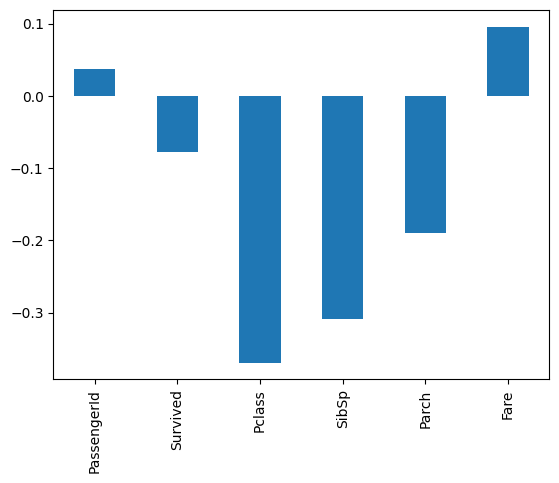

In [20]:
df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()["Age"].drop('Age').plot(kind='bar')

%%<br>
reat way to groupby... didn't know we could do this

In [21]:
df[['Survived','Pclass', 'Age']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived,Age
Pclass,,
1,0.629630,38.233441
2,0.472826,29.877630
3,0.242363,25.140620


%%<br>
reatway to plot conditionally

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


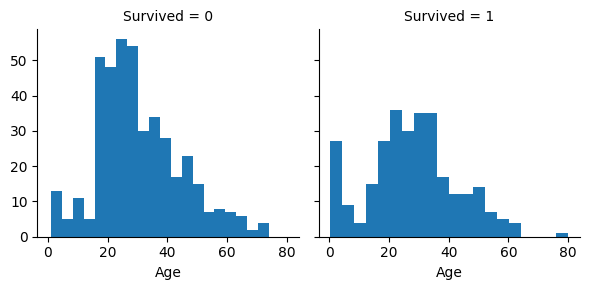

In [22]:
g=sns.FacetGrid(col='Survived',data=df)
g.map(plt.hist,'Age',bins=20)

%%

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


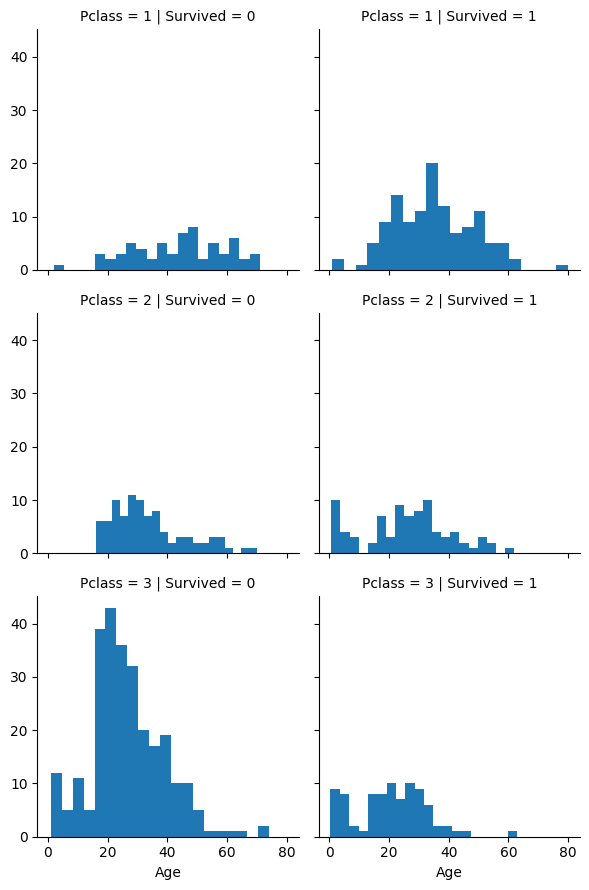

In [23]:
g=sns.FacetGrid(col='Survived',row='Pclass',data=df)
g.map(plt.hist,'Age',bins=20)

%%

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


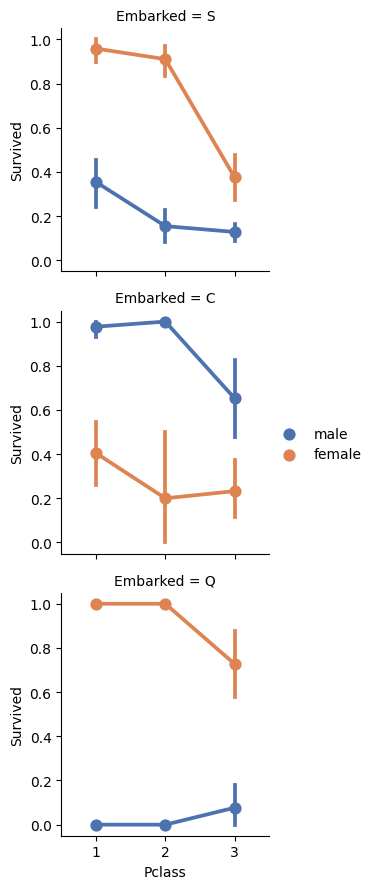

In [24]:
grid = sns.FacetGrid(df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

%%

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


%%

In [26]:
df['Parch'].nunique()

7

%%

<Axes: xlabel='Parch', ylabel='count'>

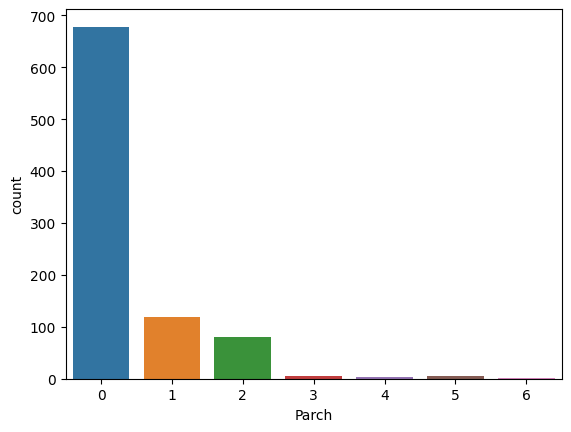

In [27]:
sns.countplot(x='Parch',data=df)

%%

In [28]:
df['Age'].mean()

29.69911764705882

%%<br>
eplacing age with mean age. We could go one more step deeper to replace seperate for Male and Female

In [29]:
df["Age"]=df["Age"].fillna(df['Age'].mean())

%%

In [30]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

%%

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


%%

In [32]:
df.drop(['PassengerId','Name','Parch','Ticket'],axis=1,inplace=True)

%%

In [33]:
sub_survived=pd.get_dummies(df['Survived'],drop_first=True)

%%

In [34]:
sub_survived

,1
0,False
1,True
2,True
3,True
4,False
...,...
886,False
887,True
888,False
889,True


%%

In [35]:
df=pd.concat([(df.drop('Survived',axis=1)),sub_survived],axis=1)

%%

In [36]:
df.head()

,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,1
0,3,male,22.0,1,7.2500,NaN,S,False
1,1,female,38.0,1,71.2833,C85,C,True
2,3,female,26.0,0,7.9250,NaN,S,True
3,1,female,35.0,1,53.1000,C123,S,True
4,3,male,35.0,0,8.0500,NaN,S,False


%%

In [37]:
df.rename(columns={1:'Survived'},inplace=True)

%%

In [38]:
df.head()

,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,7.2500,NaN,S,False
1,1,female,38.0,1,71.2833,C85,C,True
2,3,female,26.0,0,7.9250,NaN,S,True
3,1,female,35.0,1,53.1000,C123,S,True
4,3,male,35.0,0,8.0500,NaN,S,False


%%

In [39]:
sub_embark=pd.get_dummies(df['Embarked'],drop_first=True)

%%

In [40]:
sub_embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


%%

In [41]:
df=pd.concat([df.drop('Embarked',axis=1),sub_embark],axis=1)

%%

In [42]:
df.head()

,Pclass,Sex,Age,SibSp,Fare,Cabin,Survived,Q,S
0,3,male,22.0,1,7.2500,NaN,False,False,True
1,1,female,38.0,1,71.2833,C85,True,False,False
2,3,female,26.0,0,7.9250,NaN,True,False,True
3,1,female,35.0,1,53.1000,C123,True,False,True
4,3,male,35.0,0,8.0500,NaN,False,False,True


%%

In [43]:
df['Sex']=df['Sex'].map({"male":1,"female":0})

%%

In [44]:
df.drop("Cabin",axis=1,inplace=True)

%%

In [45]:
df.head()

,Pclass,Sex,Age,SibSp,Fare,Survived,Q,S
0,3,1,22.0,1,7.2500,False,False,True
1,1,0,38.0,1,71.2833,True,False,False
2,3,0,26.0,0,7.9250,True,False,True
3,1,0,35.0,1,53.1000,True,False,True
4,3,1,35.0,0,8.0500,False,False,True


%%

In [46]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

%%

In [47]:
from sklearn.model_selection import train_test_split

%%

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

%%

In [49]:
from sklearn.linear_model import LogisticRegression

%%

In [50]:
model=LogisticRegression()

%%

In [51]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

%%

In [52]:
predict=model.predict(X_test)

%%

In [53]:
from sklearn.metrics import confusion_matrix,classification_report

%%

In [54]:
print(classification_report(y_test,predict),confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

       False       0.82      0.87      0.84       157
        True       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268
 [[136  21]
 [ 30  81]]


%%

In [55]:
from sklearn.ensemble import RandomForestClassifier

%%

In [56]:
rcf=RandomForestClassifier()

%%

In [57]:
rcf.fit(X_train,y_train)

RandomForestClassifier()

%%

In [58]:
rcf_predict=rcf.predict(X_test)

%%

In [59]:
print(classification_report(y_test,rcf_predict))

              precision    recall  f1-score   support

       False       0.82      0.87      0.84       157
        True       0.80      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



%%

In [60]:
print(confusion_matrix(y_test,rcf_predict))

[[137  20]
 [ 31  80]]


%%

In [61]:
from sklearn.metrics import mean_squared_error

%%<br>
ean_squared_error(y_test,predict)

%%

In [62]:
from sklearn.metrics import accuracy_score

%%

In [63]:
print(accuracy_score(y_test,predict),accuracy_score(y_test,rcf_predict))

0.8097014925373134 0.8097014925373134


%%

In [64]:
print("Log reg accuracy score is {} and SVC accuracy score is {}".format(accuracy_score(y_test,predict),accuracy_score(y_test,rcf_predict)))

Log reg accuracy score is 0.8097014925373134 and SVC accuracy score is 0.8097014925373134


%% [markdown]<br>
Need to Clean Test data similar to train data<br>


%%

In [65]:
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

%%

In [66]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


%%

In [67]:
X_train.head()

,Pclass,Sex,Age,SibSp,Fare,Q,S
445,1,1,4.000000,0,81.8583,False,True
650,3,1,29.699118,0,7.8958,False,True
172,3,0,1.000000,1,11.1333,False,True
450,2,1,36.000000,1,27.7500,False,True
314,2,1,43.000000,1,26.2500,False,True


%%

In [68]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


%%

In [69]:
test_df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

%%

In [70]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

%%

In [71]:
test_df['Age']=test_df["Age"].fillna(test_df["Age"].mean())

%%

In [72]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

%%

In [73]:
test_df["Sex"]=test_df['Sex'].map({"male":1,"female":0})

%%

In [74]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


%%

In [75]:
em_test_dum=pd.get_dummies(test_df['Embarked'],drop_first=True)

%%

In [76]:
test_df=pd.concat([test_df.drop('Embarked',axis=1),em_test_dum],axis=1)

%%

In [77]:
test_df.drop("Parch",axis=1,inplace=True)

%%

In [78]:
test_pred=rcf.predict(test_df)

%%

In [79]:
test_df_1=pd.read_csv('/kaggle/input/titanic/test.csv')

%%

In [80]:
ids=test_df_1['PassengerId']

%%

In [81]:
type(ids)

pandas.core.series.Series

%%

%%

In [82]:
output=pd.DataFrame({'PassengerId':ids,'Survived':test_pred})

In [83]:
output["Survived"]=output["Survived"].map({True:1,False:0})

In [84]:
output["Survived"].value_counts()

Survived
0    273
1    145
Name: count, dtype: int64

%%

In [85]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


%%